**[ch0 일단 제출하고 시작하기(영상)](https://www.dacon.io/competitions/official/235713/talkboard/402861?page=1&dtype=recent)** 

[![ch0 일단 제출하고 시작하기(영상)](https://i9.ytimg.com/vi/qbcKtV_krd8/mq3.jpg?sqp=CNS0tIMG&rs=AOn4CLDqefp5ff1J7cHedxBYQFqIMXvWaA)](https://dacon.io/competitions/official/235713/talkboard/402861?page=1&dtype=recent) 

In [101]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [102]:
!cp "/content/drive/MyDrive/월간데이콘 14 강의용/data/train.csv" "/content/data/train.csv"
!cp "/content/drive/MyDrive/월간데이콘 14 강의용/data/test.csv" "/content/data/test.csv"
!cp "/content/drive/MyDrive/월간데이콘 14 강의용/data/sample_submission.csv" "/content/data/sample_submission.csv"

In [5]:
import pandas as pd

**[ch1 데이터 준비하기(영상)](https://www.dacon.io/competitions/official/235713/talkboard/402862?page=1&dtype=recent)** 

[![ch0 일단 제출하고 시작하기(영상)](https://i9.ytimg.com/vi/yYsvqwlccFk/mq2.jpg?sqp=CNS0tIMG&rs=AOn4CLDo2Nq6z1xvuttyHmCsI2kDFK6Whg)](https://dacon.io/competitions/official/235713/talkboard/402862?page=1&dtype=recent) 

In [104]:
train = pd.read_csv("/content/data/train.csv")
test = pd.read_csv("/content/data/test.csv")
sample_submission = pd.read_csv("/content/data/sample_submission.csv")

In [7]:
train.shape

(26457, 20)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [9]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


**[ch2 데이터 가공하기 (영상)](https://dacon.io/competitions/official/235713/talkboard/402877?page=1&dtype=recent)** 

[![ch2 데이터 가공하기 (영상)](https://i9.ytimg.com/vi/AWfgyln0EOM/mq2.jpg?sqp=CNS0tIMG&rs=AOn4CLAbokyUQQx-oXpqQn8mok_OwNQ5WQ)](https://dacon.io/competitions/official/235713/talkboard/402877?page=1&dtype=recent) 

### 코드 변경 안내
 위 영상에서는 train과 test를 결합하여 전처리하고 분할하여 학습에 사용합니다.    
이렇게 데이터를 다루게 될 경우, test 데이터 속 정보가 일부 train데이터로 흘러들어가는 data leakage가 발생하게 됩니다.    
참가자 분들께서 이러한 문제를 지적해 주셨습니다. 다시한 번 감사하다는 말씀을 전합니다.  
아래 코드는 이러한 data leagkage가 발생하지 않도록 코드를 수정하였습니다. 영상과 코드가 다른 점 양해바랍니다.   

In [10]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [21]:
train = train.drop("occyp_type", axis = 1)
test =  test.drop("occyp_type", axis = 1)

In [12]:
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

In [13]:
len(train['gender'].unique())

2

In [14]:
unique_len = train.apply(lambda x : len(x.unique()))

In [15]:
unique_len

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               3
dtype: int64

1. 2개 이하
2. 2개 초과 10개 이하
3. 10개 초과

In [16]:
group_1 = unique_len[unique_len <= 2].index
group_1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [17]:
group_2 = unique_len[(unique_len > 2)\
             & (unique_len <= 10)].index
group_2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [18]:
group_3 = unique_len[(unique_len > 10)].index
group_3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [19]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,F,N,N,1,0,0,0
26453,F,N,Y,1,0,0,0
26454,F,Y,N,1,0,0,0
26455,M,N,Y,1,0,0,0


In [75]:
train['gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
train['gender']

0        F
1        F
2        M
3        F
4        F
        ..
26452    F
26453    F
26454    F
26455    M
26456    F
Name: gender, Length: 26457, dtype: object

In [23]:
train['gender'] = train['gender'].replace(['F','M'], [0,  1])
test['gender'] = test['gender'].replace(['F','M'], [0,  1])

In [24]:
train['gender']

0        0
1        0
2        1
3        0
4        0
        ..
26452    0
26453    0
26454    0
26455    1
26456    0
Name: gender, Length: 26457, dtype: int64

In [25]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,N,N,1,0,0,0
1,0,N,Y,1,0,0,1
2,1,Y,Y,1,0,1,0
3,0,N,Y,1,0,1,0
4,0,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,N,N,1,0,0,0
26453,0,N,Y,1,0,0,0
26454,0,Y,N,1,0,0,0
26455,1,N,Y,1,0,0,0


In [26]:
train['car'].unique()

array(['N', 'Y'], dtype=object)

In [27]:
train['car'] = train['car'].replace(['N', 'Y'], [0, 1])
test['car'] = test['car'].replace(['N', 'Y'], [0, 1])

In [28]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,N,1,0,0,0
1,0,0,Y,1,0,0,1
2,1,1,Y,1,0,1,0
3,0,0,Y,1,0,1,0
4,0,1,Y,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,0,N,1,0,0,0
26453,0,0,Y,1,0,0,0
26454,0,1,N,1,0,0,0
26455,1,0,Y,1,0,0,0


In [29]:
train['reality'].unique()

array(['N', 'Y'], dtype=object)

In [30]:
train['reality'] = train['reality'].replace(['N', 'Y'], [0, 1])
test['reality'] = test['reality'].replace(['N', 'Y'], [0, 1])

In [31]:
train[group_1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0
26453,0,0,1,1,0,0,0
26454,0,1,0,1,0,0,0
26455,1,0,1,1,0,0,0


In [32]:
train[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,State servant,Secondary / secondary special,Married,House / apartment,4.0,1.0
26453,1,Working,Higher education,Separated,House / apartment,2.0,2.0
26454,0,Working,Secondary / secondary special,Civil marriage,With parents,2.0,2.0
26455,0,Working,Incomplete higher,Single / not married,House / apartment,1.0,2.0


<AxesSubplot:>

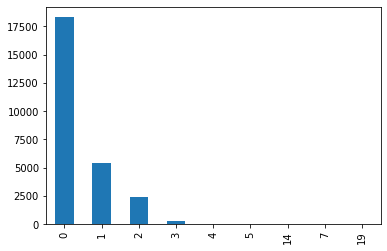

In [33]:
train["child_num"].value_counts().plot.bar()

In [34]:
train.loc[train['child_num'] > 2, 'child_num'] = 2

<AxesSubplot:>

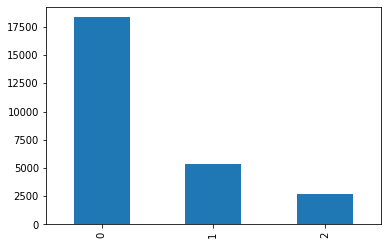

In [35]:
train["child_num"].value_counts().plot.bar()

In [36]:
train[group_2].apply(lambda x : len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          3
dtype: int64

In [37]:
from sklearn import preprocessing

In [38]:
label_encoder = preprocessing.LabelEncoder()

In [39]:
train['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [40]:
set(label_encoder.fit_transform(train['income_type']))

{0, 1, 2, 3, 4}

In [41]:
train['income_type'] = label_encoder.fit_transform(train['income_type'])
test['income_type'] = label_encoder.transform(test['income_type'])

train['edu_type'] = label_encoder.fit_transform(train['edu_type'])
test['edu_type'] = label_encoder.transform(test['edu_type'])

train['family_type'] = label_encoder.fit_transform(train['family_type'])
test['family_type'] = label_encoder.transform(test['family_type'])

train['house_type'] = label_encoder.fit_transform(train['house_type'])
test['house_type'] = label_encoder.transform(test['house_type'])

In [42]:
train[group_2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
26452,2,2,4,1,1,4.0,1.0
26453,1,4,1,2,1,2.0,2.0
26454,0,4,4,0,5,2.0,2.0
26455,0,4,2,3,1,1.0,2.0


In [43]:
train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
26452,26452,225000.0,-12079,-1984,-2.0
26453,26453,180000.0,-15291,-2475,-47.0
26454,26454,292500.0,-10082,-2015,-25.0
26455,26455,171000.0,-10145,-107,-59.0


In [44]:
train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
26452,26452,225000.0,-12079,-1984,-2.0
26453,26453,180000.0,-15291,-2475,-47.0
26454,26454,292500.0,-10082,-2015,-25.0
26455,26455,171000.0,-10145,-107,-59.0


In [45]:
train['income_total'].min()

27000.0

In [46]:
train['income_total'].max()

1575000.0

In [47]:
len(train['income_total'].unique())

249

In [48]:
import numpy as np

In [49]:
counts, bin_dividers = np.histogram(train['income_total'], bins = 7)

In [50]:
train['income_total']

0        202500.0
1        247500.0
2        450000.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26457, dtype: float64

In [51]:
train['income_total'] = pd.factorize(pd.cut(train['income_total'],
                                        bins = bin_dividers,
                                        include_lowest=True,
                                        labels = [i for i in range(7)]))[0]
                                        
test['income_total'] = pd.factorize(pd.cut(test['income_total'],
                                     bins = bin_dividers,
                                     include_lowest=True,
                                      labels = [i for i in range(7)]))[0]

In [52]:
train['income_total']

0        0
1        0
2        1
3        0
4        0
        ..
26452    0
26453    0
26454    1
26455    0
26456    0
Name: income_total, Length: 26457, dtype: int64

In [53]:
train['DAYS_BIRTH']

0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
26452   -12079
26453   -15291
26454   -10082
26455   -10145
26456   -19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64

In [54]:
train.shape

(26457, 19)

In [55]:
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

In [56]:
make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)

In [57]:
train[group_3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,3,1,0
1,1,0,2,1,0
2,2,1,6,1,1
3,3,0,4,1,2
4,4,0,4,1,1
...,...,...,...,...,...
26452,26452,0,2,1,0
26453,26453,0,4,1,3
26454,26454,1,1,1,1
26455,26455,0,1,1,3


In [58]:
train.shape

(26457, 19)

In [59]:
test.shape

(10000, 18)

**[ch3 모델 학습하기 (영상)](https://dacon.io/competitions/official/235713/talkboard/402878?page=1&dtype=recent)** 

[![ch3 모델 학습하기 (영상)](https://i9.ytimg.com/vi/fBBHiShcJZo/mq2.jpg?sqp=CIC3tIMG&rs=AOn4CLC4bxuo8l_N4x_wEBHWxRbmborLiw)](https://dacon.io/competitions/official/235713/talkboard/402878?page=1&dtype=recent) 

In [61]:
#test = data[-10000:]

In [159]:
#train = data[:-10000]

In [62]:
train_x = train.drop("credit", axis = 1)

In [63]:
train_y = train['credit']

In [69]:
#test_x = test.drop("credit", axis = 1)
test_x = test

In [70]:
train_x.shape

(26457, 18)

In [71]:
train_y.shape

(26457,)

In [72]:
test_x.shape

(10000, 18)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf = RandomForestClassifier()

In [75]:
clf.fit(train_x, train_y)

RandomForestClassifier()

In [76]:
train_proba = clf.predict_proba(train_x)

In [77]:
train_proba[:10]

array([[0.02, 0.69, 0.29],
       [0.08, 0.7 , 0.22],
       [0.04, 0.05, 0.91],
       [0.78, 0.07, 0.15],
       [0.1 , 0.02, 0.88],
       [0.09, 0.71, 0.2 ],
       [0.08, 0.07, 0.85],
       [0.76, 0.09, 0.15],
       [0.07, 0.01, 0.92],
       [0.06, 0.04, 0.9 ]])

In [78]:
np.argmax(train_proba, axis = 1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2], dtype=int64)

In [79]:
sample_submission.iloc[:,1:] =  clf.predict_proba(test_x)

In [80]:
sample_submission

,index,0,1,2
0,26457,0.16,0.21,0.63
1,26458,0.09,0.24,0.67
2,26459,0.06,0.27,0.67
3,26460,0.11,0.15,0.74
4,26461,0.12,0.42,0.46
...,...,...,...,...
9995,36452,0.09,0.33,0.58
9996,36453,0.15,0.28,0.57
9997,36454,0.21,0.11,0.68
9998,36455,0.11,0.43,0.46


In [81]:
sample_submission.to_csv("sample_submission_ver1.csv", index = False)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                 stratify = train_y, 
                 test_size = 0.25,
                 random_state = 10086
                 )

In [84]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(19842, 18) (6615, 18) (19842,) (6615,)


In [85]:
clf = RandomForestClassifier()

In [86]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
y_proba = clf.predict_proba(X_val)

In [88]:
y_val_onehot = pd.get_dummies(y_val)

In [89]:
y_proba

array([[0.18, 0.35, 0.47],
       [0.06, 0.29, 0.65],
       [0.17, 0.02, 0.81],
       ...,
       [0.05, 0.1 , 0.85],
       [0.01, 0.2 , 0.79],
       [0.17, 0.19, 0.64]])

In [90]:
y_val_onehot

,0.0,1.0,2.0
36,0,0,1
3464,0,0,1
2640,0,0,1
22500,0,1,0
17275,0,1,0
...,...,...,...
6806,0,1,0
23096,0,0,1
7756,0,0,1
23331,0,0,1


In [91]:
from sklearn.metrics import log_loss

In [92]:
log_loss(y_val_onehot, y_proba)

1.076741923213718

In [93]:
from sklearn.model_selection import StratifiedKFold

In [94]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)


In [95]:
outcomes = []
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)
    
np.mean(outcomes)

1.0603078743290344

In [96]:
np.mean(outcomes)

1.0603078743290344

In [97]:
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    sub += clf.predict_proba(test_x)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5
   
np.mean(outcomes)

1.0649665521122453

In [98]:
sub

array([[0.132, 0.194, 0.674],
       [0.076, 0.208, 0.716],
       [0.068, 0.254, 0.678],
       ...,
       [0.142, 0.086, 0.772],
       [0.112, 0.384, 0.504],
       [0.156, 0.368, 0.476]])

In [99]:
sample_submission.iloc[:,1:] =  sub

In [100]:
sample_submission.to_csv("5fold_prediction.csv", index = False)